In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Amazon_Stock.csv")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/01/2023,$138.12,40991540,$139.455,$139.96,$136.875
1,08/31/2023,$138.01,58781310,$135.06,$138.7885,$135.00
2,08/30/2023,$135.07,36137020,$134.93,$135.68,$133.92
3,08/29/2023,$134.91,38646090,$133.38,$135.14,$133.25
4,08/28/2023,$133.14,34108410,$133.78,$133.95,$131.85


In [4]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low
1253,09/10/2018,$96.9505,89621820,$98.55,$98.652,$96.5758
1254,09/07/2018,$97.6035,97139640,$96.9355,$98.76,$96.8675
1255,09/06/2018,$97.9155,149461720,$100.3253,$100.375,$96.7605
1256,09/05/2018,$99.741,163942340,$101.9055,$102.019,$99.4945
1257,09/04/2018,$101.9755,114062560,$101.325,$102.525,$100.65


In [5]:
data = data["Close/Last"]
data.head()

0    $138.12
1    $138.01
2    $135.07
3    $134.91
4    $133.14
Name: Close/Last, dtype: object

In [6]:
sum(data.isnull())

0

In [7]:
data = data.str.replace("$","")

In [8]:
data.head()

0    138.12
1    138.01
2    135.07
3    134.91
4    133.14
Name: Close/Last, dtype: object

In [9]:
data = data.astype(float)
data.head()

0    138.12
1    138.01
2    135.07
3    134.91
4    133.14
Name: Close/Last, dtype: float64

In [10]:
import matplotlib.pyplot as plt
plt.plot(data)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [13]:
print(data)

[[0.59412344]
 [0.59320195]
 [0.56857316]
 ...
 [0.25732476]
 [0.27261723]
 [0.29133594]]


In [14]:

##splitting dataset into train and test split
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data

array([[0.59412344],
       [0.59320195],
       [0.56857316],
       [0.56723282],
       [0.55240529],
       [0.55341054],
       [0.54151501],
       [0.57234288],
       [0.56170391],
       [0.56530608],
       [0.55307546],
       [0.55944208],
       [0.56857316],
       [0.59035372],
       [0.61464743],
       [0.59655281],
       [0.59780938],
       [0.59186161],
       [0.60936983],
       [0.62846971],
       [0.60627029],
       [0.51696999],
       [0.51110599],
       [0.54025843],
       [0.55692894],
       [0.54461455],
       [0.51144108],
       [0.51060336],
       [0.51881296],
       [0.5160485 ],
       [0.52610107],
       [0.52576598],
       [0.57100253],
       [0.54980837],
       [0.55592368],
       [0.56530608],
       [0.56212277],
       [0.53280278],
       [0.51588096],
       [0.50205868],
       [0.5242581 ],
       [0.51236256],
       [0.52928438],
       [0.52794404],
       [0.52911684],
       [0.50850908],
       [0.51805902],
       [0.519

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
12/12 [==============================] - 2s 181ms/step - loss: 0.1413 - val_loss: 0.0133
Epoch 2/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0185 - val_loss: 0.0309
Epoch 3/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 4/200
12/12 [==============================] - 1s 100ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 5/200
12/12 [==============================] - 1s 99ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 6/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 7/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 8/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 9/200
12/12 [==============================] - 1s 100ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 10/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0052 - val_los

12/12 [==============================] - 1s 102ms/step - loss: 0.0016 - val_loss: 7.3967e-04
Epoch 80/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0017 - val_loss: 5.4018e-04
Epoch 81/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0016 - val_loss: 4.9114e-04
Epoch 82/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0015 - val_loss: 5.2430e-04
Epoch 83/200
12/12 [==============================] - 1s 103ms/step - loss: 0.0015 - val_loss: 5.2682e-04
Epoch 84/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0015 - val_loss: 7.2896e-04
Epoch 85/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0015 - val_loss: 6.0622e-04
Epoch 86/200
12/12 [==============================] - 1s 108ms/step - loss: 0.0015 - val_loss: 9.0905e-04
Epoch 87/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 88/200
12/12 [==============================] - 1s 102ms/

12/12 [==============================] - 1s 102ms/step - loss: 8.9702e-04 - val_loss: 2.6536e-04
Epoch 156/200
12/12 [==============================] - 1s 102ms/step - loss: 8.6224e-04 - val_loss: 2.6233e-04
Epoch 157/200
12/12 [==============================] - 1s 103ms/step - loss: 8.5748e-04 - val_loss: 2.5694e-04
Epoch 158/200
12/12 [==============================] - 1s 102ms/step - loss: 0.0010 - val_loss: 2.5866e-04
Epoch 159/200
12/12 [==============================] - 1s 103ms/step - loss: 0.0010 - val_loss: 3.0927e-04
Epoch 160/200
12/12 [==============================] - 1s 104ms/step - loss: 8.4553e-04 - val_loss: 3.2719e-04
Epoch 161/200
12/12 [==============================] - 1s 102ms/step - loss: 8.9738e-04 - val_loss: 3.1161e-04
Epoch 162/200
12/12 [==============================] - 1s 102ms/step - loss: 9.1401e-04 - val_loss: 2.7071e-04
Epoch 163/200
12/12 [==============================] - 1s 103ms/step - loss: 8.2989e-04 - val_loss: 3.2453e-04
Epoch 164/200
12/12 [==

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.3.1'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.69846000086966

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.45370788265768

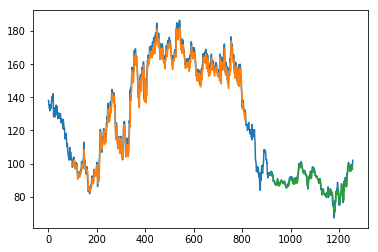

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

441

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.12311462020147013,
 0.13680286498146554,
 0.13025194244905658,
 0.1240067854824185,
 0.12071875850803171,
 0.147538168338604,
 0.14628997465915516,
 0.14233596515110258,
 0.13847410416972084,
 0.114452658694423,
 0.1242329682297012,
 0.13079226790089848,
 0.13213261010701804,
 0.13094305639908688,
 0.11960459904919474,
 0.09693606148819867,
 0.0654757167689376,
 0.0817483088651072,
 0.06618358499654453,
 0.05615196129761879,
 0.04929108463004461,
 0.053169699889003,
 0.0,
 0.014027518900919467,
 0.048951810509120675,
 0.06329766068399345,
 0.08692119206684956,
 0.07411673542901431,
 0.10385557812729063,
 0.13169699889002906,
 0.1338583006973969,
 0.12535550482732627,
 0.12442983099122507,
 0.11944543341221814,
 0.14879055058744695,
 0.13589394542294086,
 0.17943831284424805,
 0.1450124609939475,
 0.1380594357997026,
 0.1398102578064463,
 0.09946176883285518,
 0.09942407170830814,
 0.06622128212109157,
 0.07236591342227061,
 0.06345682632097005,
 0.07050618861127989,
 0.1044838635364

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.27540845]
101
1 day input [0.13680286 0.13025194 0.12400679 0.12071876 0.14753817 0.14628997
 0.14233597 0.1384741  0.11445266 0.12423297 0.13079227 0.13213261
 0.13094306 0.1196046  0.09693606 0.06547572 0.08174831 0.06618358
 0.05615196 0.04929108 0.0531697  0.         0.01402752 0.04895181
 0.06329766 0.08692119 0.07411674 0.10385558 0.131697   0.1338583
 0.1253555  0.12442983 0.11944543 0.14879055 0.13589395 0.17943831
 0.14501246 0.13805944 0.13981026 0.09946177 0.09942407 0.06622128
 0.07236591 0.06345683 0.07050619 0.10448386 0.11538671 0.10682946
 0.1202999  0.12267901 0.15433622 0.17212926 0.1723722  0.1251754
 0.11888835 0.13469183 0.13469183 0.10641061 0.07810006 0.08164359
 0.1251754  0.1835473  0.13413475 0.1779053  0.18653375 0.17594923
 0.17875139 0.20430585 0.1993759  0.17465916 0.18624474 0.1572389
 0.17227167 0.22046954 0.21799828 0.22856604 0.23684684 0.2550001
 0.2627699  0.27661312 0.27604348 0.28022367 0.26425265 0.264127
 0.24729314 0.23918826 0.25145658 0.243

12 day output [[0.22672485]]
13 day input [0.13094306 0.1196046  0.09693606 0.06547572 0.08174831 0.06618358
 0.05615196 0.04929108 0.0531697  0.         0.01402752 0.04895181
 0.06329766 0.08692119 0.07411674 0.10385558 0.131697   0.1338583
 0.1253555  0.12442983 0.11944543 0.14879055 0.13589395 0.17943831
 0.14501246 0.13805944 0.13981026 0.09946177 0.09942407 0.06622128
 0.07236591 0.06345683 0.07050619 0.10448386 0.11538671 0.10682946
 0.1202999  0.12267901 0.15433622 0.17212926 0.1723722  0.1251754
 0.11888835 0.13469183 0.13469183 0.10641061 0.07810006 0.08164359
 0.1251754  0.1835473  0.13413475 0.1779053  0.18653375 0.17594923
 0.17875139 0.20430585 0.1993759  0.17465916 0.18624474 0.1572389
 0.17227167 0.22046954 0.21799828 0.22856604 0.23684684 0.2550001
 0.2627699  0.27661312 0.27604348 0.28022367 0.26425265 0.264127
 0.24729314 0.23918826 0.25145658 0.24396741 0.25009529 0.23626463
 0.26230078 0.27054389 0.27059834 0.26940459 0.24924082 0.25471109
 0.25732476 0.27261723 0.2

23 day output [[0.19281198]]
24 day input [0.04895181 0.06329766 0.08692119 0.07411674 0.10385558 0.131697
 0.1338583  0.1253555  0.12442983 0.11944543 0.14879055 0.13589395
 0.17943831 0.14501246 0.13805944 0.13981026 0.09946177 0.09942407
 0.06622128 0.07236591 0.06345683 0.07050619 0.10448386 0.11538671
 0.10682946 0.1202999  0.12267901 0.15433622 0.17212926 0.1723722
 0.1251754  0.11888835 0.13469183 0.13469183 0.10641061 0.07810006
 0.08164359 0.1251754  0.1835473  0.13413475 0.1779053  0.18653375
 0.17594923 0.17875139 0.20430585 0.1993759  0.17465916 0.18624474
 0.1572389  0.17227167 0.22046954 0.21799828 0.22856604 0.23684684
 0.2550001  0.2627699  0.27661312 0.27604348 0.28022367 0.26425265
 0.264127   0.24729314 0.23918826 0.25145658 0.24396741 0.25009529
 0.23626463 0.26230078 0.27054389 0.27059834 0.26940459 0.24924082
 0.25471109 0.25732476 0.27261723 0.29133594 0.27540845 0.27651379
 0.27212173 0.26630768 0.26016548 0.25425377 0.24889429 0.24419145
 0.24009049 0.23645031 

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:

len(data)

1258

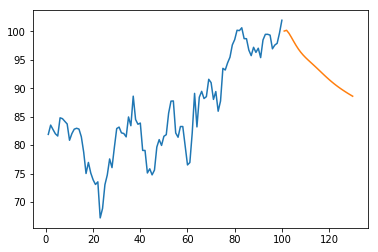

In [42]:
plt.plot(day_new,scaler.inverse_transform(data[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

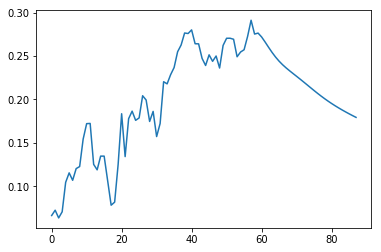

In [43]:
data2=data.tolist()
data2.extend(lst_output)
plt.plot(data2[1200:])

In [44]:
data2=scaler.inverse_transform(data2).tolist()

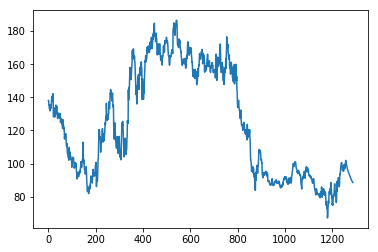

In [45]:
plt.plot(data2)